In [1]:
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<b>Reading the csv file which is available in the local:</b>

In [2]:
train = pd.read_csv(r"C:/users/manoj/downloads/train.csv")
test = pd.read_csv(r"C:/users/manoj/downloads/test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<b> To Checkout null values in the dataframes </b>

In [5]:
def null(train, test):
    print("Training Data")
    print(pd.isnull(train).sum()) 
    print(" ")
    print("Testing Data")
    print(pd.isnull(test).sum())

null(train, test)

Training Data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<b> Deleting columns with no informative data </b>

In [6]:
train.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
test.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

<b>fillna(): It is used to replace null value with the data provided with the median function based on the columns</b>

In [7]:
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True) 
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)

In [8]:
null(train,test)

Training Data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


<h3> Visualizing using seaborn and matplotlib library: </h3>

<b>sns.barplot() is used to plot the data in the datasets in the form of barchart using plt.show(), it displays to the user.</b>

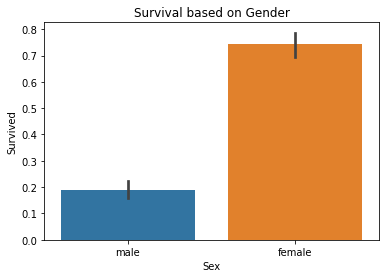

In [9]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival based on Gender")
plt.show()

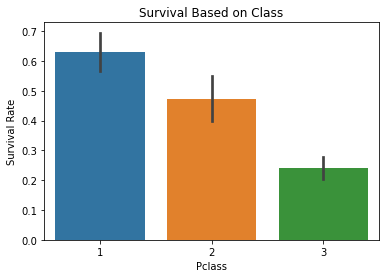

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Based on Class")
plt.show()

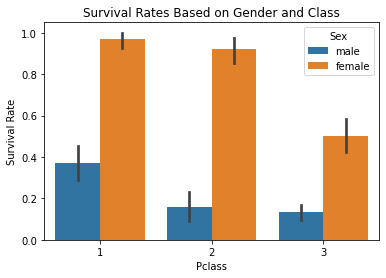

In [11]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
plt.show()

<b>Converting the categorical values into numerical values in the given dataframes.</b>

In [12]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [14]:
age = [train, test]
for ages in age:
    ages.loc[ ages['Age'] <= 11, 'Age'] = 0
    ages.loc[(ages['Age'] > 11) & (ages['Age'] <= 18), 'Age'] = 1
    ages.loc[(ages['Age'] > 18) & (ages['Age'] <= 22), 'Age'] = 2
    ages.loc[(ages['Age'] > 22) & (ages['Age'] <= 27), 'Age'] = 3
    ages.loc[(ages['Age'] > 27) & (ages['Age'] <= 33), 'Age'] = 4
    ages.loc[(ages['Age'] > 33) & (ages['Age'] <= 40), 'Age'] = 5
    ages.loc[(ages['Age'] > 40) & (ages['Age'] <= 66), 'Age'] = 6
    ages.loc[ ages['Age'] > 66, 'Age'] = 7
    
age

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name Sex  Age  SibSp  Parch  \
 0                              Braund, Mr. Owen Harris   0  2.0      1      0   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...   1  5.0      1      0   
 2                               Heikkinen, Miss. Laina   1  3.0      0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  5.0      1      0   
 4                             Allen, Mr. William Henry   0  5.0      0      0   
 ..                                   

In [15]:
Pclass=train['Pclass'].value_counts()  
Class=Pclass/len(train)
Class

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [16]:
Psex=train['Sex'].value_counts()
Sex=Psex/len(train)
Sex

0    0.647587
1    0.352413
Name: Sex, dtype: float64

In [17]:
P_age=train['Age'].value_counts()
P_Age=P_age/len(train)
P_Age

4.0    0.340067
6.0    0.160494
3.0    0.118967
5.0    0.113356
2.0    0.103255
1.0    0.079686
0.0    0.076319
7.0    0.007856
Name: Age, dtype: float64

In [18]:
survived_counts=train['Survived'].value_counts()
s=survived_counts/len(train)
s

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [19]:
survived=train.loc[train['Survived'] == 1]
died=train.loc[train['Survived'] == 0]
survived


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,3.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5.0,1,0,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3.0,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,1.0,0,0,7.2250,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,6.0,0,1,83.1583,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",1,3.0,0,1,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,2.0,0,0,30.0000,S


In [20]:
died

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,7.2500,S
4,5,0,3,"Allen, Mr. William Henry",0,5.0,0,0,8.0500,S
5,6,0,3,"Moran, Mr. James",0,4.0,0,0,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,6.0,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",0,3.0,0,0,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,5.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",0,3.0,0,0,13.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,4.0,1,2,23.4500,S


In [21]:
Psurvived=survived['Pclass'].value_counts()  
classSurvived=Psurvived/len(survived)

Ssurvived=survived['Sex'].value_counts()  
sexSurvived=Ssurvived/len(survived)

Asurvived=survived['Age'].value_counts()  
ageSurvived=Asurvived/len(survived)

In [22]:
classSurvived

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

In [23]:
sexSurvived

1    0.681287
0    0.318713
Name: Sex, dtype: float64

In [24]:
ageSurvived

4.0    0.295322
6.0    0.157895
5.0    0.131579
3.0    0.125731
0.0    0.114035
1.0    0.090643
2.0    0.081871
7.0    0.002924
Name: Age, dtype: float64

In [25]:
Pdied=died['Pclass'].value_counts()  
classDied=Pdied/len(died)

Sdied=died['Sex'].value_counts()  
sexDied=Sdied/len(died)

Adied=died['Age'].value_counts()  
ageDied=Adied/len(died)

In [26]:
classDied

3    0.677596
2    0.176685
1    0.145719
Name: Pclass, dtype: float64

In [27]:
sexDied

0    0.852459
1    0.147541
Name: Sex, dtype: float64

In [28]:
ageDied

4.0    0.367942
6.0    0.162113
2.0    0.116576
3.0    0.114754
5.0    0.102004
1.0    0.072860
0.0    0.052823
7.0    0.010929
Name: Age, dtype: float64

In [29]:
def Bayes(p, px1y, px2y, px3y, px1, px2, px3):
    pNum=px1y*px2y*px3y*p
    pDen=px1*px2*px3
    b=pNum/pDen
    return b

In [30]:
prediction=[]

In [31]:
for i in range(0,418):
    testClass=test.iloc[i]['Pclass']
    testSex=test.iloc[i]['Sex']
    testAge=test.iloc[i]['Age']
    testSurvived=Bayes(s[1], classSurvived[testClass], sexSurvived[testSex], ageSurvived[testAge], Class[testClass], Sex[testSex], P_Age[testAge])
    testDied=Bayes(s[0], classDied[testClass], sexDied[testSex], ageDied[testAge], Class[testClass], Sex[testSex], P_Age[testAge])
    if testSurvived > testDied:
        survived=1
    else:
        survived=0
    prediction.append(survived)

In [32]:
result = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': prediction})
result.to_csv('result_predicted.csv', index=False)

In [33]:
test_predicted = pd.read_csv(r"C:/users/manoj/result_predicted.csv")

In [34]:
test_predicted

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
